## Load the python packages

In [1]:
import numpy as np
import netCDF4 as netCDF
import matplotlib.pyplot as plt
import cmocean
from mpl_toolkits.basemap import Basemap
import octant
from matplotlib import path
from datetime import datetime, timedelta
import pandas as pd

%matplotlib inline

## Load simulated data

In [2]:
# temp and salt from the surface
temp_model_east = np.load('temp_salt_n/sfc/temp_model_east_sfc.npy')
temp_model_west = np.load('temp_salt_n/sfc/temp_model_west_sfc.npy')

salt_model_east = np.load('temp_salt_n/sfc/salt_model_east_sfc.npy')
salt_model_west = np.load('temp_salt_n/sfc/salt_model_west_sfc.npy')

# temp and salt from the bottom
temp_model_eastf = np.load('temp_salt_n/bt/temp_model_eastf.npy')
temp_model_westf = np.load('temp_salt_n/bt/temp_model_westf.npy')

salt_model_eastf = np.load('temp_salt_n/bt/salt_model_eastf.npy')
salt_model_westf = np.load('temp_salt_n/bt/salt_model_westf.npy')

In [3]:
dates = pd.date_range('01/01/2010', '12/31/2015 22:00:00 ', freq='2H')
print dates.shape

(26292,)


## Load real data for temperature between 2010 and 2016

In [4]:
temperature_east_2010_2016 = open('nerss_data/temp_2010_2016_east.txt')

temp_east_2016 = []

for line in temperature_east_2010_2016:
    if line == "\n":
        temp_east_2016.append(np.nan)
    else:
        temp_east_2016.append(line)
        
temp_east_2016 = np.asarray(temp_east_2016)
temp_east_2016 = temp_east_2016.astype('float64')

temperature_west_2010_2016 = open('nerss_data/temp_2010_2016_west.txt')

temp_west_2016 = []

for line in temperature_west_2010_2016:
    if line == "\n":
        temp_west_2016.append(np.nan)
    else:
        temp_west_2016.append(line)
        
temp_west_2016 = np.asarray(temp_west_2016)
temp_west_2016 = temp_west_2016.astype('float64')

# 2 hours resolution to match the model's output
temp_west_2016 = temp_west_2016[::8]
temp_east_2016 = temp_east_2016[::8]

## Time series comparing simulated and real data for two points in the bay. 

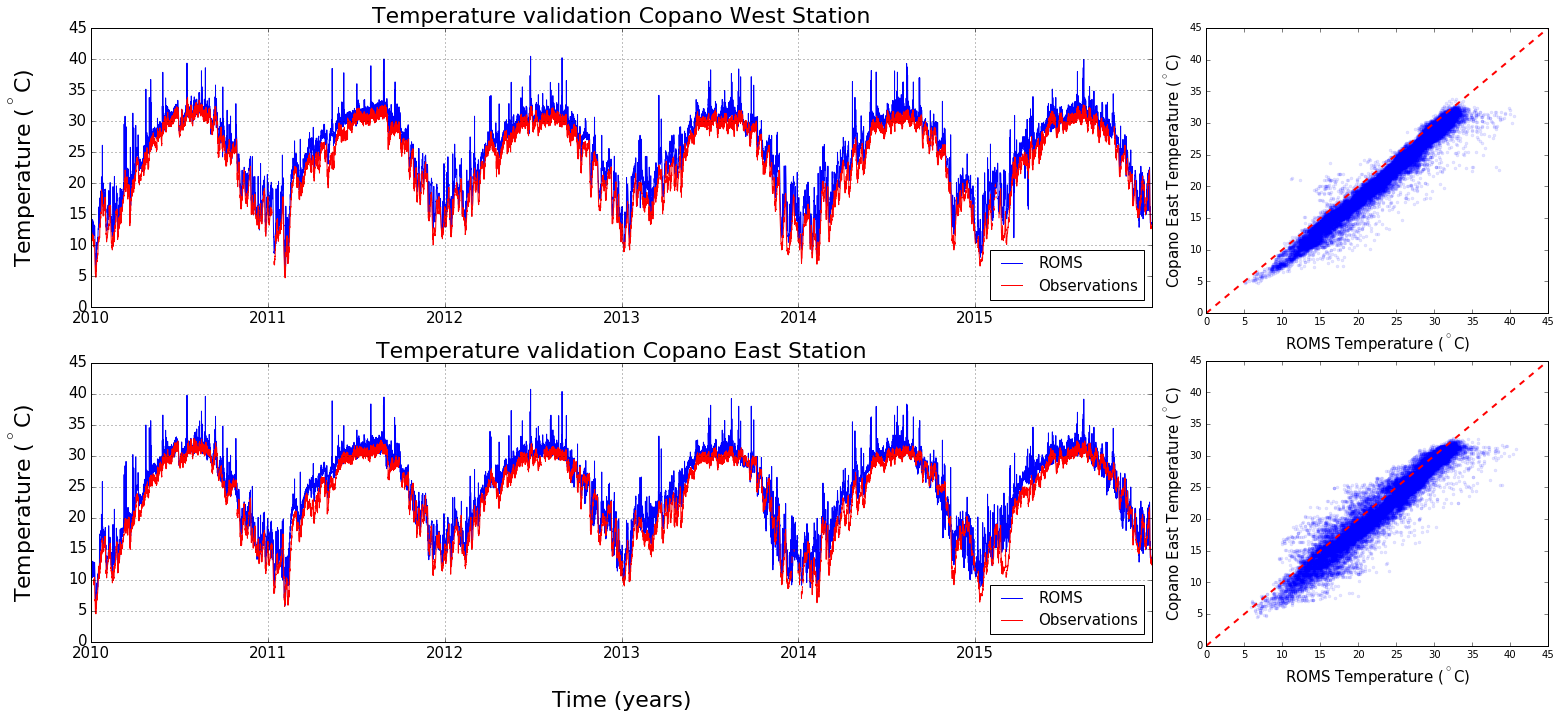

In [39]:
fig = plt.figure(figsize=(19,11))

# plot Copano West Station

ax1 = fig.add_subplot(2,1,1)

ax1.plot(dates[0:len(temp_model_east)], temp_model_west,'-b', label = 'ROMS')
ax1.plot(dates[0:len(temp_model_east)], temp_west_2016[0:len(temp_model_east)],'-r', label = 'Observations')

legend = plt.legend(loc='lower right', shadow=False, fontsize = 15)

plt.tick_params(labelsize = 15)
plt.title('Temperature validation Copano West Station', fontsize = 22)
#plt.xlabel('Time (days)', labelpad = 30, fontsize = 22)
plt.ylabel('Temperature ($^\circ$C)', labelpad = 30, fontsize = 22)
plt.grid()
ax2 = fig.add_subplot(2,1,2)

ax2.plot(dates[0:len(temp_model_east)],temp_model_east,'-b', label = 'ROMS')
ax2.plot(dates[0:len(temp_model_east)],temp_east_2016[0:len(temp_model_east)],'-r', label = 'Observations')
plt.grid()
legend = plt.legend(loc='lower right', shadow=False, fontsize = 15)

plt.tick_params(labelsize = 15)
plt.title('Temperature validation Copano East Station', fontsize = 22)
plt.xlabel('Time (years)', labelpad = 30, fontsize = 22)
plt.ylabel('Temperature ($^\circ$C)', labelpad = 30, fontsize = 22)

axts = fig.add_axes([0.94, 0.12, 0.25, 0.36])
axts.plot(temp_model_east,temp_east_2016[0:len(temp_model_east)], '.b', alpha=0.1)
axts.plot([0, 45], [0, 45], '--r', lw=2)
axts.set_xlabel('ROMS Temperature ($^\circ$C)',fontsize=15)
axts.set_ylabel('Copano East Temperature ($^\circ$C)', fontsize = 15)


axts1 = fig.add_axes([0.94, 0.54, 0.25, 0.36])
axts1.plot(temp_model_west,temp_west_2016[0:len(temp_model_east)], '.b', alpha=0.1)
axts1.plot([0, 45], [0, 45], '--r', lw=2)
axts1.set_xlabel('ROMS Temperature ($^\circ$C)',fontsize=15)
axts1.set_ylabel('Copano East Temperature ($^\circ$C)', fontsize = 15)



plt.savefig('/Users/arthur/dissertation/latex/mythesis_2/figures/results/temp_validation_new.png',bbox_inches = 'tight')


# Salinity validation

## Load the observations and simulated data

In [5]:
salinity_east_2010_2016 = open('nerss_data/salt_2010_2016_east.txt')

salt_east_2016 = []

for line in salinity_east_2010_2016:
    if line == "\n":
        salt_east_2016.append(np.nan)
    else:
        salt_east_2016.append(line)
        
salt_east_2016 = np.asarray(salt_east_2016)
salt_east_2016 = salt_east_2016.astype('float64')

salinity_west_2010_2016 = open('nerss_data/salt_2010_2016_west.txt')

salt_west_2016 = []

for line in salinity_west_2010_2016:
    if line == "\n":
        salt_west_2016.append(np.nan)
    else:
        salt_west_2016.append(line)
        
salt_west_2016 = np.asarray(salt_west_2016)
salt_west_2016 = salt_west_2016.astype('float64')

# 2 hours resolution to match the model's output
salt_west_2016 = salt_west_2016[::8]
salt_east_2016 = salt_east_2016[::8]

## Plot the observation x simulated data for salinity

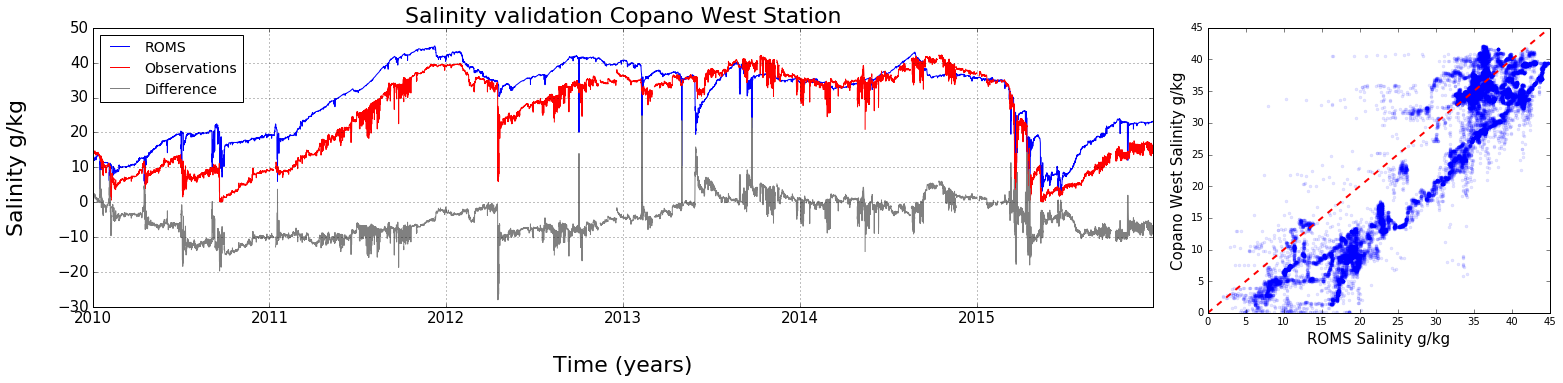

In [7]:
fig = plt.figure(figsize=(19,11))

# plot Copano West Station

ax1 = fig.add_subplot(2,1,1)

ax1.plot(dates[0:len(salt_model_east)], salt_model_west,'-b', label = 'ROMS')
ax1.plot(dates[0:len(salt_model_east)], salt_west_2016[0:len(salt_model_east)],'-r', label = 'Observations')
ax1.plot(dates[0:len(temp_model_east)], salt_west_2016[0:len(temp_model_east)] - salt_model_west
         ,color = 'gray', label = 'Difference')

legend = plt.legend(loc='upper left', shadow=False, fontsize = 14)

plt.tick_params(labelsize = 15)
plt.title('Salinity validation Copano West Station', fontsize = 22)
#plt.xlabel('Time (days)', labelpad = 30, fontsize = 22)
plt.ylabel('Salinity g/kg', labelpad = 30, fontsize = 22)
plt.grid()

#ax2 = fig.add_subplot(2,1,2)

# ax2.plot(dates[0:len(salt_model_east)],salt_model_east,'-b', label = 'ROMS')
# ax2.plot(dates[0:len(salt_model_east)],salt_east_2016[0:len(salt_model_east)],'-r', label = 'Observations')
# ax2.plot(dates[0:len(temp_model_east)], salt_east_2016[0:len(temp_model_east)] - salt_model_east
#          ,color = 'gray', label = 'Difference')
# plt.grid()
# legend = plt.legend(loc='upper left', shadow=False, fontsize = 14)

plt.tick_params(labelsize = 15)
plt.title('Salinity validation Copano West Station', fontsize = 22)
plt.xlabel('Time (years)', labelpad = 30, fontsize = 22)
plt.ylabel('Salinity g/kg', labelpad = 30, fontsize = 22)

axts1 = fig.add_axes([0.94, 0.54, 0.25, 0.36])
axts1.plot(salt_model_west,salt_west_2016[0:len(salt_model_east)], '.b', alpha=0.1)
axts1.plot([0, 45], [0, 45], '--r', lw=2)
axts1.set_xlabel('ROMS Salinity g/kg',fontsize=15)
axts1.set_ylabel('Copano West Salinity g/kg', fontsize = 15)

# axts = fig.add_axes([0.94, 0.12, 0.25, 0.36])
# axts.plot(salt_model_east,salt_east_2016[0:len(salt_model_east)], '.b', alpha=0.1)
# axts.plot([0, 45], [0, 45], '--r', lw=2)
# axts.set_xlabel('ROMS Salinity g/kg',fontsize=15)
# axts.set_ylabel('Copano East Salinity g/kg', fontsize = 15)


plt.savefig('/Users/arthur/dissertation/latex/mythesis_2/figures/results/salt_validation_new_compare.png',bbox_inches = 'tight')
